In [23]:
import os
import pandas as pd

In [24]:
token = os.environ['oanda_access_token']
account = os.environ['oanda_account_id']

In [36]:
from oanda_bot import Bot

params={'a': 30, 'b': 10, 'c': 15, 'stop_loss': 43, 'take_profit': 20}
class CheckBot(Bot):
    def atr(self, *, period: int = 14, price: str = "C"):
        a = (self.df.H - self.df.L).abs()
        b = (self.df.H - self.df[price].shift()).abs()
        c = (self.df.L - self.df[price].shift()).abs()

        df = pd.concat([a, b, c], axis=1).max(axis=1)
        return df.ewm(span=period).mean()
        
    def strategy(self):
        rsi = self.rsi(period=params['a'])
        ema = self.ema(period=params['b'])
        atr = self.atr(period=params['c'])
        lower = ema - atr
        upper = ema + atr
        self.buy_entry = (rsi < 30) & (self.df.C < lower)
        self.sell_entry = (rsi > 70) & (self.df.C > upper)
        self.sell_exit = ema > self.df.C
        self.buy_exit = ema < self.df.C
        self.stop_loss = params['stop_loss']
        self.take_profit = params['take_profit']

total profit        46900.000
total trades          208.000
win rate               75.962
profit factor           1.246
maximum drawdown    25600.000
recovery factor         1.832
riskreward ratio        0.536
sharpe ratio            0.095
average return        197.280
stop loss              36.000
take profit            88.000
dtype: float64


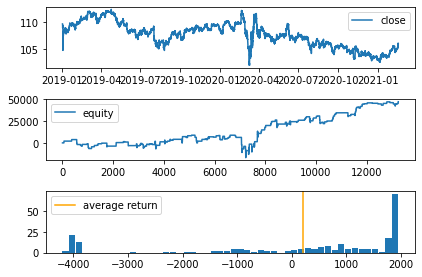

In [37]:
CheckBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='USD_JPY',
    granularity='H1', # 15 second candlestick,
).backtest(from_date="2019-1-1", to_date="2021-2-14", filename="backtest.png")

In [13]:
MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='EUR_USD',
    granularity='S15', # 15 second candlestick
).report(filename="report.png", days=-7) 

Transactions do not exist


In [12]:
df = MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='EUR_USD',
    granularity='S15', # 15 second candlestick
)._candles(from_date="2020-7-7", to_date="2020-7-9")

df.head()

,O,H,L,C,V
T,,,,,
2020-07-07 04:00:00+00:00,1.13100,1.13102,1.13094,1.13102,16.0
2020-07-07 04:00:15+00:00,1.13103,1.13103,1.13102,1.13102,2.0
2020-07-07 04:00:30+00:00,1.13103,1.13103,1.13102,1.13102,4.0
2020-07-07 04:01:00+00:00,1.13100,1.13101,1.13097,1.13101,7.0
2020-07-07 04:01:15+00:00,1.13100,1.13102,1.13096,1.13098,10.0


In [13]:
df = MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='EUR_USD',
    granularity='M1', # 15 second candlestick
)._candles(from_date="2020-7-7", to_date="2020-7-9")

df.head()

,O,H,L,C,V
T,,,,,
2020-07-07 04:00:00+00:00,1.13100,1.13103,1.13094,1.13102,22.0
2020-07-07 04:01:00+00:00,1.13100,1.13102,1.13096,1.13098,25.0
2020-07-07 04:02:00+00:00,1.13097,1.13100,1.13094,1.13097,15.0
2020-07-07 04:03:00+00:00,1.13096,1.13102,1.13096,1.13102,11.0
2020-07-07 04:04:00+00:00,1.13100,1.13100,1.13094,1.13100,28.0


In [17]:
df = MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='EUR_USD',
    granularity='M15', # 15 second candlestick
)._candles(from_date="2020-7-7", to_date="2020-7-9")

df.head()

,O,H,L,C,V
T,,,,,
2020-07-07 04:00:00+00:00,1.13100,1.13103,1.13070,1.13080,250.0
2020-07-07 04:15:00+00:00,1.13078,1.13112,1.13077,1.13100,277.0
2020-07-07 04:30:00+00:00,1.13098,1.13120,1.13080,1.13108,342.0
2020-07-07 04:45:00+00:00,1.13106,1.13140,1.13098,1.13116,248.0
2020-07-07 05:00:00+00:00,1.13115,1.13158,1.13108,1.13158,338.0


In [14]:
df = MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='EUR_USD',
    granularity='H1', # 15 second candlestick
)._candles(from_date="2020-7-7", to_date="2020-7-9")

df.head()

,O,H,L,C,V
T,,,,,
2020-07-07 04:00:00+00:00,1.13100,1.13140,1.13070,1.13116,1117.0
2020-07-07 05:00:00+00:00,1.13115,1.13160,1.13026,1.13084,1524.0
2020-07-07 06:00:00+00:00,1.13084,1.13088,1.12916,1.12938,4264.0
2020-07-07 07:00:00+00:00,1.12937,1.12959,1.12812,1.12856,8118.0
2020-07-07 08:00:00+00:00,1.12857,1.12900,1.12632,1.12648,8102.0


In [16]:
df = MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument='EUR_USD',
    granularity='H8', # 15 second candlestick
)._candles(from_date="2020-7-7", to_date="2020-7-9")

df.head()

,O,H,L,C,V
T,,,,,
2020-07-06 21:00:00+00:00,1.13119,1.13325,1.13064,1.13116,9266.0
2020-07-07 05:00:00+00:00,1.13115,1.13160,1.12590,1.12981,44624.0
2020-07-07 13:00:00+00:00,1.12982,1.13069,1.12685,1.12742,38655.0
2020-07-07 21:00:00+00:00,1.12767,1.12828,1.12652,1.12763,8032.0
2020-07-08 05:00:00+00:00,1.12764,1.12954,1.12624,1.12884,39824.0
